# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

**Выводы по общим данным**

1. Столбец *first_day_exposition* - имеет тип object, должен быть тип datetime


2. Столбец *ceiling_height* - пропущенные значения


3. Столбец *floors_total* - должен быть тип int (количество этажей - целое значение)


4. Столбец *is_apartment*  - должен быть тип bool; пропущенные значения


5. Столбец *living_area* - пропущенные значения


6. Столбец *kitchen_area* - пропущенные значения


7. Столбец *balcony* - пропущенные значения; должен быть тип int;


8. Столбец *locality_name* - дубликаты (из данных сейчас этого не видно, но есть указание в описании задания); пропущенные значения


9. Столбец *airports_nearest* - пропущенные значения


10. Столбец *cityCenters_nearest* - пропущенные значения (возможно, потому, что квартира уже находится в центре); требуется изменить название столбца и привести к змеиному регистру


11. Столбец *parks_around3000* -  пропущенные значения; привести к змеиному регистру


12. Столбец *parks_nearest* - пропущенные значения


13. Столбец *ponds_around3000* - пропущенные значения; привести к змеиному регистру


14. Столбец *ponds_nearest* - пропущенные значения


15. Столбец *days_exposition* - должен быть тип int; пропущенные значения

In [1]:
import pandas as pd #импортируем библиотеку Pandas как pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') #Читаем файл и сохраняем в переменную df, используем параметр sep для указания разделителя
df.info() #используем метод info для получения общей информации о датафрейме
df.head(10) #выводим первые 10 строк датафрейма,чтобы визуально на первый взгляд оценить данные в датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Предобработка данных

**Вывод**
1. Работа с пропусками


**Высота потолков:** *было пропущено 38,8% значений*, при этом часть значений были введены вручную с ошибкой (27 м вместо 2,7 м и т.д.). Необходимо добавить условие на ручной ввод: высота потолков не может быть двузначной величиной, а также меньше 2,5 м (в данных существуют значения в 1,75 м и даже в 1 м). Все пропущенные значения обработаны: была сделана замена на медиану для зданий конкретной этажности (либо на общую медиану).


**Число этажей в доме:** *пропущено 0,4% значений*. Данный признак будет использоваться в анализе, при этом достаточно точно заменить пропущенные значения не представляется возможным, поэтому все строки с пропущенными значениями удалены. Предлагается автоматизировать заполнение данных по этому признаку для городов на основе точного адреса.


**Жилая площадь и площадь кухни:** *пропущено 7,9% и 9,4%* значений соответственно. Предположили, что есть корреляция между общей площадью квартиры и жилой площадью/площадью кухни. Для жилой площади, действительно так и получилось, для площади кухни утверждение может быть спорным, однако отрицать связь тоже невозможно. На основании зависимостей рассчитали средний коэффициент и заполнили пропуски.

**Апартаменты:** *Пропущено 88.2% значений*. Предположили, что отсутствие значения в данном столбце означает, что данный объект недвижимости не является аппартаментами. Соотвтетсвенно заполнили столбец False. Это удобно, поскольку с булевыми значениями можно проводить некоторые арифметические операции.


**Число балконов:** *пропущено 48,6% значений*. Предполагается, что отсутствие числа балконов свидетельствует о том, что число балконов равно нулю.


**Название населенного пункта:** *пропущено 0,2% значений*. Все строки с пропущенными значениями заменены на "Не указано", так как этот признак будет использоваться при дальнейшем анализе, возможно данные пригодятся. Необходимо ввести условие об обязательном заполнении данного признака в объявлении (либо об автоматизированном заполнении на основе указанной улицы, если это возможно).


**Расстояние до центра города:** *пропущено 23,3% значений*. Поскольку трудоемкость заполнения таких пропущенных значений велика по сравнению с их общим количеством, оставим данные пропущенные значения без изменений.


**Расстояние до ближайшего аэропорта** *(Пропущено 23.4% значений)*, **число парков в радиусе 3 км** *(Пропущено 23.3% значений)*, **расстояние до ближайшего парка** *(Пропущено 65.9% значений)*, **число водоемов в радиусе 3 км** *(Пропущено 23.3% значений)*, **расстояние до ближайшего водоема** *(Пропущено 61.6% значений)*: пропущенные значения в этих признаках оставлены без изменений, так как они не будут использованы в текущем исследовании. Хотя по этой группе значений больше всего вопросов. Слишком много пропусков. Можно предположить, что данные характеристики в приложении появились не так давно, поэтому в общей массе не заполнены, но в любом случае все вопросы по пропускам в данных лучше уточнить у людей, которые их собирали.


**Длительность размещения объявления:** *пропущено 13,5% значений.* Все пропущенные значения были заменены на медиану.

2. Замена типов данных


Столбец **first_day_exposition** - тип данных заменен на *datetime* (поскольку это дата, с таким форматом потом сможем работать в исследовании)


Столбец **is_apartment** - тип данных заменен на *bool* (с булевым типом данных можно проводить арифметические операции)


Столбцы **balcony, floors_total, days_exposition** - тип данных заменен на *int* (поскольку это целочисленные значения)


3. Дубликаты

Явные дубликаты остсутствуют. Замена неявных дубликатов была проведена вручую методом replace(). Стоит пояснить почему замена была произведена не самым рациональным способом. Дело в том, что для части значений можно было бы применить логическую индексацию, или функцию, которая меняла бы букву "ё" в слове поселок на букву "е", но это всё равно не позволило бы заменить все неявные дубликаты.  

4. Аномалии

Аномальные значения наблюдались в столбце 'ceiling_height'. Высота потолка явно не может быть 27м, была произведена замена и корректировка. В других столбцах выбросов не обнаружено. По крайней мере в процессе предобрабоки.

**2.1. Работа с пропусками**

In [3]:
#Перед тем, как начнем работу с пропусками, приведем все названия столбцов к единому стилю
df = df.rename(columns={'cityCenters_nearest' : 'city_сenters_nearest', 
                            'parks_around3000' : 'parks_around_3000', 
                            'ponds_around3000' : 'ponds_around_3000'})
#проверим, как выполнили переименование
print(df.columns)
#переименование выполнено успешно, продолжаем предобработку данных
print(df.isna().sum()) #найдем число пропусков в столбцах

#создадим функцию для подсчета и печати доли пропущенных значений в столбце
def print_nan_ratio(column):
    return print('Пропущено {:.1%}'. format(df[column].isna().value_counts()[1] / len(df), 2) + ' значений')

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_сenters_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')
total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_сenters_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_ar

**2.1.1. Высота потолков**

In [4]:
print_nan_ratio('ceiling_height') #считаем долю пропусков в столбце "высота потолков"
#делаем сводную таблицу по высоте потолков
ceiling_medians = df.pivot_table(index='floors_total', values='ceiling_height', aggfunc=['median', 'count'])
ceiling_medians.columns = ['median', 'count']
ceiling_medians.head()

Пропущено 38.8% значений


,median,count
floors_total,,
1.0,2.80,10
2.0,2.70,215
3.0,2.80,399
4.0,3.00,789
5.0,2.55,3666


In [5]:
# заменяем значения высоты потолков на общую медиану для отсутствующих значений этажности дома
for floor in ceiling_medians.index:
    df.loc[(df['floors_total'].isna()) | 
             ((df['floors_total'] == floor) & (ceiling_medians.loc[floor, 'count'] == 0)), 
             'ceiling_height'] = df['ceiling_height'].describe()[5]

# медианы из сгруппированной таблицы вставляем на места пропущенных значений высоты потолков для дома соответствующей этажности
for floor in ceiling_medians.index:
    df.loc[(df['ceiling_height'].isna()) & 
             (df['floors_total'] == floor), 
             'ceiling_height'] = ceiling_medians.loc[floor, 'median']

**2.1.2. Число этажей в доме**

In [6]:
print_nan_ratio('floors_total') #cчитаем долю пропущенных значений в столбце с числом этажей
#доля пропущенных значений меньше половины процента, можно избавиться от пропусков,
#скорее всего отбрасывание этих значений не внесет существенную роль в исследование и выводы
df.dropna(subset=['floors_total'], inplace=True) 

Пропущено 0.4% значений


**2.1.3. Жилая площадь**

In [7]:
print_nan_ratio('living_area')#cчитаем долю пропущенных значений в столбце с жилой площадью
#выясняем зависимость между жилой площадью и общей площадью, чтобы заполнить пропуски
#для этого найдем коэффициент корреляции
print('Коэффициент корреляции', df['total_area'].corr(df['living_area']))
#коэффициент корреляции 0,9, зависимость линейная
#в переменную living_ratio сохраняем коэффициент зависимости жилой площади от общей площади
living_ratio = df['living_area'].median() / df['total_area'].median()
df['living_area'].fillna(living_ratio * df['total_area'], inplace=True)

Пропущено 7.9% значений
Коэффициент корреляции 0.9397704889780099


**2.1.4. Апартаменты**

In [8]:
#Производим замену пропущенных значений в столбце "апартаменты" на False
print_nan_ratio('is_apartment')
df['is_apartment'] = df['is_apartment'].fillna(False)

Пропущено 88.2% значений


**2.1.5. Площадь кухни**

In [9]:
#С пропусками в столбце с площадью кухни заменим аналогично замене пропусков в жилой площади
print_nan_ratio('kitchen_area')#cчитаем долю пропущенных значений в столбце с площадью кухни
#выясняем зависимость между площадью кухни и общей площадью, чтобы заполнить пропуски
#для этого найдем коэффициент корреляции
print('Коэффициент корреляции', df['total_area'].corr(df['kitchen_area']))
#коэффициент корреляции 0,6 - зависимость имеется, правда, не так ярко выражена как в случае с жилой площадью
#в переменную kitchen_ratio сохраняем коэффициент зависимости жилой площади от общей площади
kitchen_ratio = df['kitchen_area'].median() / df['total_area'].median()
df['kitchen_area'].fillna(kitchen_ratio * df['total_area'], inplace=True)

Пропущено 9.4% значений
Коэффициент корреляции 0.6094677166170349


**2.1.6. Число балконов**

In [10]:
#cчитаем долю пропущенных значений в столбце с числом балконоа
print_nan_ratio('balcony')
#Пропущенных значений достаточно много, практически половина, естественно, мы не можем отбросить половину исходных данных,
#Поскольку это сильно повлияет на ход исследования.
#Будем считать, что, если число балконов не указано - их просто нет в данной квартире.
#Стоит уточнить у людей, ответственых за сбор данных почему так много пропусков, возможно, наше допущение окажется верным
df['balcony'] = df['balcony'].fillna(0)

Пропущено 48.6% значений


**2.1.6. Название населённого пункта**

In [11]:
#cчитаем долю пропущенных значений в столбце с названием населённого пункта
print_nan_ratio('locality_name')
#Поскольку пропущенный значений очень мало, а восстановить их самостоятельно будет довольно трудоемким процессом
#Произведем замену пропущенных значений на "Не указано"
df['locality_name'] = df['locality_name'].fillna('Не указано')

Пропущено 0.2% значений


**2.1.7. Расстояние до ближайшего аэропорта**

In [12]:
#cчитаем долю пропущенных значений в столбце с расстоянием до ближайшего аэропорта
print_nan_ratio('airports_nearest')

Пропущено 23.4% значений


**2.1.8. Расстояние до центра города**

In [13]:
#cчитаем долю пропущенных значений в столбце с расстоянием до центра города
print_nan_ratio('city_сenters_nearest')

Пропущено 23.3% значений


**2.1.8. Число парков в радиусе 3 км**

In [14]:
#cчитаем долю пропущенных значений в столбце с числом парков в радиусе 3 км
print_nan_ratio('parks_around_3000')

Пропущено 23.3% значений


**2.1.9. Расстояние до ближайшего парка**

In [15]:
#cчитаем долю пропущенных значений в столбце с расстоянием до ближайшего парка
print_nan_ratio('parks_nearest')

Пропущено 65.9% значений


**2.1.10. Число водоемов в радиусе 3 км**

In [16]:
#cчитаем долю пропущенных значений в столбце с числом водоемов в радиусе 3 км
print_nan_ratio('ponds_around_3000')

Пропущено 23.3% значений


**2.1.11. Расстояние до ближайшего водоёма**

In [17]:
#cчитаем долю пропущенных значений в столбце с расстоянием до ближайшего водоема
print_nan_ratio('ponds_nearest')

Пропущено 61.6% значений


**2.1.12. Число дней размещения объявления (от публикации до снятия)**

In [18]:
#cчитаем долю пропущенных значений в столбце с числом дней размещения объявления (от публикации до снятия)
print_nan_ratio('days_exposition')
#произведём замену пропущенных значений в столбце с числом дней размещения объявления
df['days_exposition'].fillna(df['days_exposition'].median(), inplace=True)

Пропущено 13.4% значений


In [19]:
#Проверим пропуски после всех сделанных замен, убедимся, что замены сделаны успешно
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5532
city_сenters_nearest     5509
parks_around_3000        5508
parks_nearest           15568
ponds_around_3000        5508
ponds_nearest           14552
days_exposition             0
dtype: int64

**2.2.Замена типа данных**

In [20]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['balcony'] = df['balcony'].astype('int')
df['floors_total'] = df['floors_total'].astype('int')
df['is_apartment'] = df['is_apartment'].astype('bool')
df['days_exposition'] = df['days_exposition'].astype('int')

**2.3. Дубликаты**

In [21]:
#Для начала проведем проверку на явные дубликаты
df.duplicated().sum()
#Как видим, их нет

0

In [22]:
#Проверим уникальные значения столбца locality_name
print(df['locality_name'].unique())
#Проведем ручную замену дубликатов
df['locality_name'] = df['locality_name'].replace('посёлок городского типа Красный Бор', 'поселок городского типа Красный Бор')
df['locality_name'] = df['locality_name'].replace('посёлок Пансионат Зелёный Бор', 'поселок Пансионат Зелёный Бор')
df['locality_name'] = df['locality_name'].replace('городской посёлок Янино-1', 'городской поселок Янино-1')
df['locality_name'] = df['locality_name'].replace(['посёлок Мурино', 'Мурино'], 'поселок Мурино')
df['locality_name'] = df['locality_name'].replace('Кудрово', 'деревня Кудрово')
df['locality_name'] = df['locality_name'].replace('деревня Фёдоровское', 'городской посёлок Фёдоровское')
df['locality_name'] = df['locality_name'].replace('посёлок городского типа Лебяжье', 'поселок городского типа Лебяжье')
df['locality_name'] = df['locality_name'].replace('посёлок городского типа Кузьмоловский', 'поселок городского типа Кузьмоловский')
df['locality_name'] = df['locality_name'].replace('посёлок Аннино', 'поселок Аннино')
df['locality_name'] = df['locality_name'].replace('посёлок Новый Свет', 'поселок Новый Свет')
df['locality_name'] = df['locality_name'].replace('Никольское', 'село Никольское')
df['locality_name'] = df['locality_name'].replace('посёлок Бугры', 'поселок Бугры')
df['locality_name'] = df['locality_name'].replace(['городской посёлок Рощино','посёлок городского типа Рощино'], 'поселок городского типа Рощино')
df['locality_name'] = df['locality_name'].replace('посёлок Усть-Луга', 'поселок Усть-Луга')
df['locality_name'] = df['locality_name'].replace(['посёлок городского типа Павлово','городской посёлок Павлово'], 'поселок городского типа Павлово')
df['locality_name'] = df['locality_name'].replace('городской посёлок Лесогорский', 'поселок городского типа Лесогорский')
df['locality_name'] = df['locality_name'].replace('посёлок Победа', 'поселок Победа')
df['locality_name'] = df['locality_name'].replace('посёлок Терволово', 'поселок Терволово')
df['locality_name'] = df['locality_name'].replace('городской посёлок Советский', 'поселок городского типа Советский')
df['locality_name'] = df['locality_name'].replace('посёлок Петровское', 'поселок Петровское')
df['locality_name'] = df['locality_name'].replace('посёлок городского типа Токсово', 'поселок городского типа Токсово')
df['locality_name'] = df['locality_name'].replace('посёлок городского типа Вырица', 'поселок городского типа Вырица')
df['locality_name'] = df['locality_name'].replace('посёлок Тельмана', 'поселок Тельмана')
df['locality_name'] = df['locality_name'].replace('городской поселок Большая Ижора', 'поселок городского типа Большая Ижора')
df['locality_name'] = df['locality_name'].replace('посёлок городского типа имени Свердлова', 'поселок городского типа имени Свердлова')
df['locality_name'] = df['locality_name'].replace(['поселок Рябово', 'посёлок городского типа Рябово'], 'поселок городского типа Рябово')
df['locality_name'] = df['locality_name'].replace('посёлок Поляны', 'поселок Поляны')
df['locality_name'] = df['locality_name'].replace(['посёлок городского типа Мга', 'городской посёлок Мга'], 'поселок городского типа Мга')
df['locality_name'] = df['locality_name'].replace('посёлок Мичуринское', 'поселок Мичуринское')
df['locality_name'] = df['locality_name'].replace('посёлок Ильичёво', 'поселок Ильичёво')
df['locality_name'] = df['locality_name'].replace('посёлок при железнодорожной станции Вещево', 'поселок станции Вещево')
df['locality_name'] = df['locality_name'].replace('посёлок Гаврилово', 'поселок Гаврилово')
df['locality_name'] = df['locality_name'].replace('городской посёлок Назия', 'поселок городского типа Назия')
df['locality_name'] = df['locality_name'].replace('посёлок Старая Малукса', 'поселок Старая Малукса')
df['locality_name'] = df['locality_name'].replace('посёлок при железнодорожной станции Приветнинское', 'поселок станции Приветнинское')
df['locality_name'] = df['locality_name'].replace('посёлок Мельниково', 'поселок Мельниково')
df['locality_name'] = df['locality_name'].replace('Любань', 'поселок Любань')
df['locality_name'] = df['locality_name'].replace('коттеджный посёлок Лесное', 'поселок Лесное')
df['locality_name'] = df['locality_name'].replace('посёлок городского типа Форносово', 'поселок городского типа Форносово')
df['locality_name'] = df['locality_name'].replace('посёлок Войскорово', 'поселок Войсковицы')
df['locality_name'] = df['locality_name'].replace('посёлок Стеклянный', 'поселок Стеклянный')
df['locality_name'] = df['locality_name'].replace('посёлок Сумино', 'поселок Сумино')
df['locality_name'] = df['locality_name'].replace('посёлок Возрождение', 'поселок Возрождение')
df['locality_name'] = df['locality_name'].replace('посёлок Лисий Нос', 'поселок Лисий Нос')
df['locality_name'] = df['locality_name'].replace('посёлок Жилгородок', 'поселок Жилгородок')
df['locality_name'] = df['locality_name'].replace('посёлок станции Громово', 'поселок Громово')
df['locality_name'] = df['locality_name'].replace('посёлок Коробицыно', 'поселок Коробицыно')
df['locality_name'] = df['locality_name'].replace('посёлок Кобралово', 'поселок Кобралово')
df['locality_name'] = df['locality_name'].replace('посёлок Перово', 'поселок Перово')


['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

### Посчитайте и добавьте в таблицу новые столбцы

In [23]:
# Добавляем столбец со стоимостью квадратного метра ('price_per_sqm') и приводим его в целочисленный тип
df['price_per_sqm'] = df['last_price'] / df['total_area']
df['price_per_sqm'] = df['price_per_sqm'].astype(int)

In [24]:
# Добавляем столбцы дня недели, месяца и года
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

In [25]:
# Создаём функцию категоризации для заполнения нового столбца с типом этажа
def floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
#применяем функцию категоризации для столбца с количеством этажей в доме    
df['floor_type'] = df.apply(floor_category, axis=1)

In [26]:
# Добавляем столбец с расстоянием до центра города в километрах
df['city_сenters_nearest_km'] = df['city_сenters_nearest'] / 1000

# Добавляем столбец с расстоянием до ближайшего аэропорта в километрах
df['airports_nearest_km'] = df['airports_nearest'] / 1000

# Добавляем столбец с расстоянием до ближайшего водоема в километрах
df['ponds_nearest_km'] = df['ponds_nearest'] / 1000

# Добавляем столбец с расстоянием до ближайшего парка в километрах
df['parks_nearest_km'] = df['parks_nearest'] / 1000

In [27]:
# Проверим, успешно ли добавились новые столбцы
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23613 non-null  int64         
 1   last_price               23613 non-null  float64       
 2   total_area               23613 non-null  float64       
 3   first_day_exposition     23613 non-null  datetime64[ns]
 4   rooms                    23613 non-null  int64         
 5   ceiling_height           23613 non-null  float64       
 6   floors_total             23613 non-null  int64         
 7   living_area              23613 non-null  float64       
 8   floor                    23613 non-null  int64         
 9   is_apartment             23613 non-null  bool          
 10  studio                   23613 non-null  bool          
 11  open_plan                23613 non-null  bool          
 12  kitchen_area             23613 n

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_per_sqm,weekday,month,year,floor_type,city_сenters_nearest_km,airports_nearest_km,ponds_nearest_km,parks_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.000000,8,False,...,95,120370,3,3,2019,другой,16.028,18.863,0.755,0.482
1,7,3350000.0,40.40,2018-12-04,1,2.75,11,18.600000,1,False,...,81,82920,1,12,2018,первый,18.603,12.817,NaN,NaN
2,10,5196000.0,56.00,2015-08-20,2,2.55,5,34.300000,4,False,...,558,92785,3,8,2015,другой,13.933,21.741,0.574,0.090
3,0,64900000.0,159.00,2015-07-24,3,2.60,14,91.730769,9,False,...,424,408176,4,7,2015,другой,6.800,28.098,0.234,0.084
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.000000,13,False,...,121,100000,1,6,2018,другой,8.098,31.856,0.048,0.112
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.400000,5,False,...,55,95065,0,9,2018,другой,NaN,NaN,NaN,NaN
6,6,3700000.0,37.30,2017-11-02,1,2.66,26,10.600000,6,False,...,155,99195,3,11,2017,другой,19.143,52.996,NaN,NaN
7,5,7915000.0,71.60,2019-04-18,2,2.75,24,41.307692,22,False,...,95,110544,3,4,2019,другой,11.634,23.982,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,2.70,27,15.430000,26,False,...,189,87454,2,5,2018,другой,NaN,NaN,NaN,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.600000,7,False,...,289,88524,6,2,2017,другой,15.008,50.898,NaN,NaN


### Проведите исследовательский анализ данных

**4.1. Изучение основных параметров**


**Вывод**

*Средняя квартира*, выставленная на продажу, имеет следующие характеристики: 


- это 2-комнатная квартира площадью 52 кв. м (из которых 30 кв. м - жилой площади, а площадь кухни при этом 9 кв. м);

- с потолками 2,65 м;

- расположенная в 9-этажном здании на 4-ом этаже;

- ценой 4,7 млн рублей;

- расстояние до центра города в среднем составляет 13 км;

- расстояние до ближайшего аэропорта в среднем составляет 26,7 км;

- расстояние до ближайшего парка в среднем составляет 455 м.

- Объявления в среднем выкладывают в среду, если говорить о месяце - это июнь.


*Аномальные характеристики* квартир из представленного набора данных:

- 7-комнатная квартира или больше;

- общей площадью более 115 кв. м;

- жилой площадью более 70 кв.м.;

- площадью кухни более 20 кв.м.;

- расположенная выше 16 этажа;

- в более, чем 30-этажном доме;

- с потолками менее 2,25 м или более 3,05 м;

- по цене более 12 млн рублей;

- расстояние до центра больше 27 км.;

- расстояние до ближайшего аэропорта больше 62 км.;

- расстояние до ближайшего парка больше 1,1 км.


**4.1.1. Общая площадь**

count    23613.000000
mean        60.340678
std         35.648988
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64


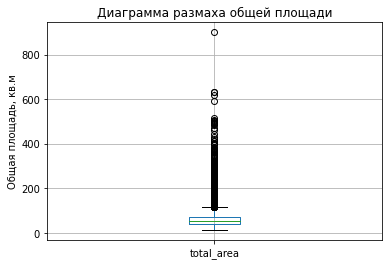

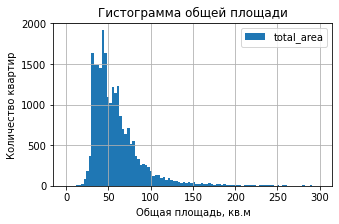

In [28]:
#Построим диаграмму размаха для общей площади
df.boxplot(['total_area'])
plt.title('Диаграмма размаха общей площади')
plt.ylabel('Общая площадь, кв.м')
#Гистограмму ,чтобы знать распределение частот
df.plot(y = 'total_area', kind = 'hist', bins=100, grid=True, figsize = (5,3), range = (0,300))
plt.title('Гистограмма общей площади')
plt.xlabel('Общая площадь, кв.м')
plt.ylabel('Количество квартир')
#Общие статистические сведения о столбце
print(df['total_area'].describe())

**4.1.2. Жилая площадь**

count    23613.000000
mean        34.631561
std         22.394364
min          2.000000
25%         19.000000
50%         30.000000
75%         42.173077
max        409.700000
Name: living_area, dtype: float64


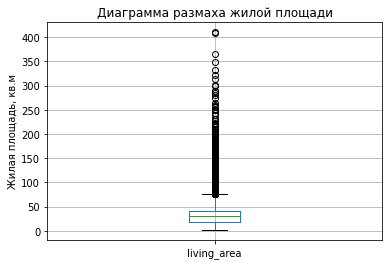

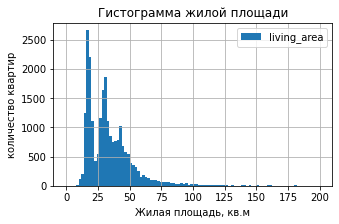

In [29]:
#Построим диаграмму размаха для жилой площади
df.boxplot(['living_area'])
plt.title('Диаграмма размаха жилой площади')
plt.ylabel('Жилая площадь, кв.м')
#Гистограмму ,чтобы знать распределение частот
df.plot(y = 'living_area', kind = 'hist', bins=100, grid=True, figsize = (5,3), range = (0,200))
plt.title('Гистограмма жилой площади')
plt.xlabel('Жилая площадь, кв.м')
plt.ylabel('количество квартир')
#Общие статистические сведения о столбце
print(df['living_area'].describe())

**4.1.3. Площадь кухни**

count    23613.000000
mean        10.502668
std          6.040009
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64


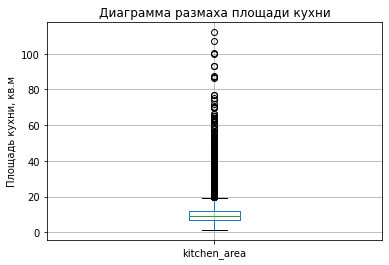

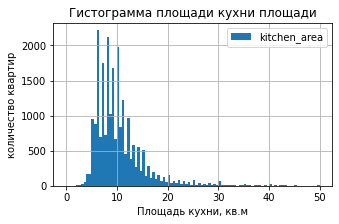

In [30]:
#Построим диаграмму размаха для площади кухни
df.boxplot(['kitchen_area'])
plt.title('Диаграмма размаха площади кухни')
plt.ylabel('Площадь кухни, кв.м')
#Гистограмму ,чтобы знать распределение частот
df.plot(y = 'kitchen_area', kind = 'hist', bins=100, grid=True, figsize = (5,3), range = (0,50))
plt.title('Гистограмма площади кухни площади')
plt.xlabel('Площадь кухни, кв.м')
plt.ylabel('количество квартир')
#Общие статистические сведения о столбце
print(df['kitchen_area'].describe())

**4.1.3. Цена объекта**

count    2.361300e+04
mean     6.540555e+06
std      1.090172e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64


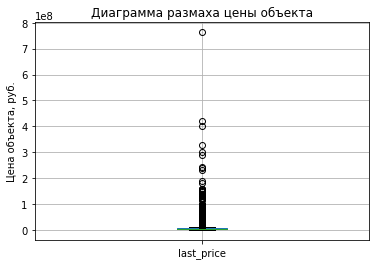

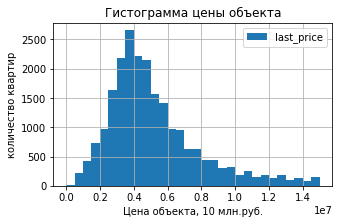

In [31]:
#Построим диаграмму размаха для площади кухни
df.boxplot(['last_price'])
plt.title('Диаграмма размаха цены объекта')
plt.ylabel('Цена объекта, руб.')
#Гистограмму ,чтобы знать распределение частот
df.plot(y = 'last_price', kind = 'hist', grid=True, bins=30, figsize = (5,3), range=(0, 15000000))
plt.title('Гистограмма цены объекта')
plt.xlabel('Цена объекта, 10 млн.руб.')
plt.ylabel('количество квартир')
#Общие статистические сведения о столбце
print(df['last_price'].describe())

**4.1.4. Количество комнат**

count    23613.000000
mean         2.071147
std          1.078380
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


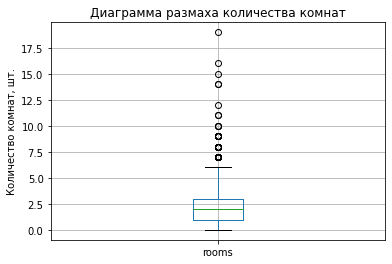

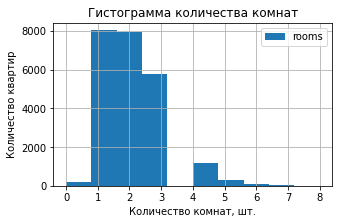

In [32]:
#Построим диаграмму размаха для количества комнат
df.boxplot(['rooms'])
plt.title('Диаграмма размаха количества комнат')
plt.ylabel('Количество комнат, шт.')
#Гистограмму ,чтобы знать распределение частот
df.plot(y = 'rooms', kind = 'hist', grid=True, bins=10, figsize = (5,3), range=(0, 8))
plt.title('Гистограмма количества комнат')
plt.xlabel('Количество комнат, шт.')
plt.ylabel('Количество квартир')
#Общие статистические сведения о столбце
print(df['rooms'].describe())

**4.1.4. Высота потолков**

count    23613.000000
mean         2.735913
std          0.996070
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64


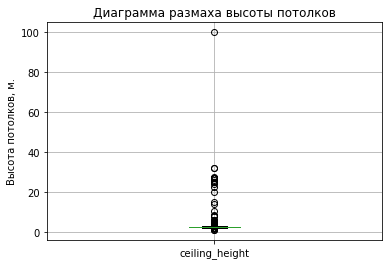

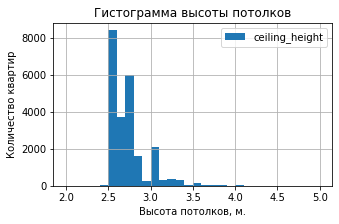

In [33]:
#Построим диаграмму размаха для высоты потолков
df.boxplot(['ceiling_height'])
plt.title('Диаграмма размаха высоты потолков')
plt.ylabel('Высота потолков, м.')
#Гистограмму ,чтобы знать распределение частот
df.plot(y = 'ceiling_height', kind = 'hist', grid=True, bins=30, figsize = (5,3), range=(2, 5))
plt.title('Гистограмма высоты потолков')
plt.xlabel('Высота потолков, м.')
plt.ylabel('Количество квартир')
#Общие статистические сведения о столбце
print(df['ceiling_height'].describe())

**4.1.5. Этаж квартиры**

count    23613.000000
mean         5.877313
std          4.873539
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


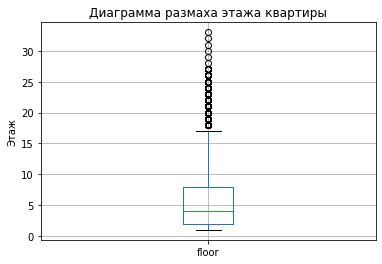

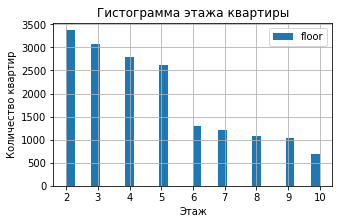

In [34]:
#Построим диаграмму размаха для этажа квартиры
df.boxplot(['floor'])
plt.title('Диаграмма размаха этажа квартиры')
plt.ylabel('Этаж')
#Гистограмму ,чтобы знать распределение частот
df.plot(y = 'floor', kind = 'hist', grid=True, bins=30, figsize = (5,3), range=(2, 10))
plt.title('Гистограмма этажа квартиры')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
#Общие статистические сведения о столбце
print(df['floor'].describe())

**4.1.6. Тип этажа квартиры**

Text(0, 0.5, 'Количество квартир')

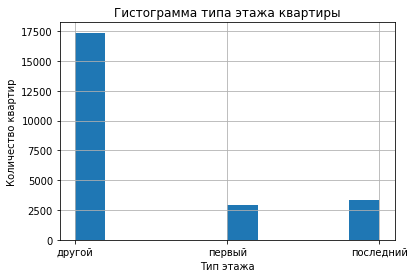

In [35]:
#Построим гистограмму ,чтобы знать распределение частот
df['floor_type'].hist()
plt.title('Гистограмма типа этажа квартиры')
plt.xlabel('Тип этажа')
plt.ylabel('Количество квартир')

**4.1.7. Общее количество этажей в доме**

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


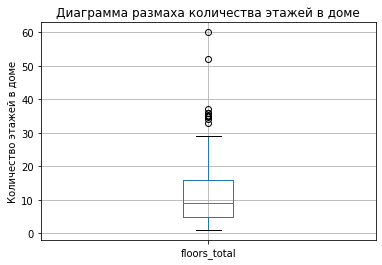

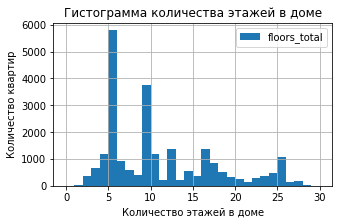

In [36]:
#Построим диаграмму размаха для количества этажей в доме
df.boxplot(['floors_total'])
plt.title('Диаграмма размаха количества этажей в доме')
plt.ylabel('Количество этажей в доме')
#Гистограмму ,чтобы знать распределение частот
df.plot(y = 'floors_total', kind = 'hist', grid=True, bins=30, figsize = (5,3), range=(0, 30))
plt.title('Гистограмма количества этажей в доме')
plt.xlabel('Количество этажей в доме')
plt.ylabel('Количество квартир')
#Общие статистические сведения о столбце
print(df['floors_total'].describe())

**4.1.8. Расстояние до центра города в метрах**

count    18104.000000
mean     14185.084015
std       8614.132292
min        181.000000
25%       9233.750000
50%      13093.000000
75%      16287.000000
max      65968.000000
Name: city_сenters_nearest, dtype: float64


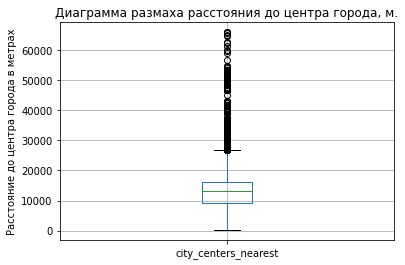

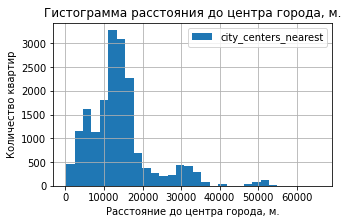

In [37]:
#Построим диаграмму размаха для расстояния до центра города в метрах
df.boxplot(['city_сenters_nearest'])
plt.title('Диаграмма размаха расстояния до центра города, м.')
plt.ylabel('Расстояние до центра города в метрах')
#Гистограмму ,чтобы знать распределение частот
df.plot(y = 'city_сenters_nearest', kind = 'hist', grid=True, bins=30, figsize = (5,3))
plt.title('Гистограмма расстояния до центра города, м.')
plt.xlabel('Расстояние до центра города, м.')
plt.ylabel('Количество квартир')
#Общие статистические сведения о столбце
print(df['city_сenters_nearest'].describe())

**4.1.9. Расстояние до ближайшего аэропорта**

count    18081.000000
mean        28.788008
std         12.626210
min          0.000000
25%         18.575000
50%         26.726000
75%         37.242000
max         84.869000
Name: airports_nearest_km, dtype: float64


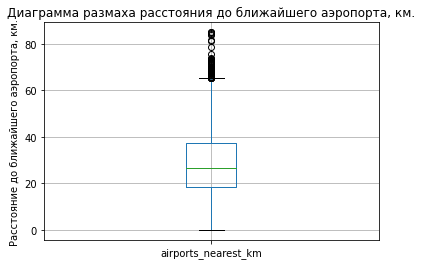

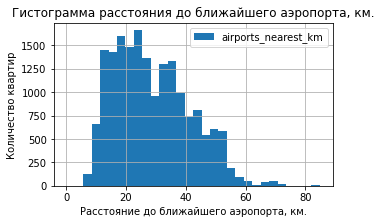

In [38]:
#Построим диаграмму размаха для расстояния до ближайшего аэропорта в километрах
df.boxplot(['airports_nearest_km'])
plt.title('Диаграмма размаха расстояния до ближайшего аэропорта, км.')
plt.ylabel('Расстояние до ближайшего аэропорта, км.')
#Гистограмму ,чтобы знать распределение частот
df.plot(y = 'airports_nearest_km', kind = 'hist', grid=True, bins=30, figsize = (5,3))
plt.title('Гистограмма расстояния до ближайшего аэропорта, км.')
plt.xlabel('Расстояние до ближайшего аэропорта, км.')
plt.ylabel('Количество квартир')
#Общие статистические сведения о столбце
print(df['airports_nearest_km'].describe())

**4.1.10. Расстояние до ближайшего парка**

count    8045.000000
mean        0.490555
std         0.341337
min         0.001000
25%         0.288000
50%         0.455000
75%         0.612000
max         3.190000
Name: parks_nearest_km, dtype: float64


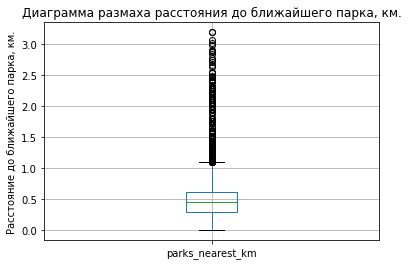

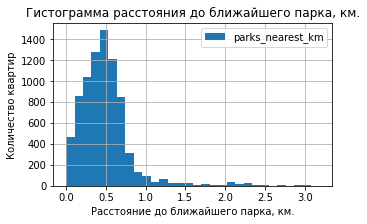

In [39]:
#Построим диаграмму размаха для расстояния до ближайшего парка в километрах
df.boxplot(['parks_nearest_km'])
plt.title('Диаграмма размаха расстояния до ближайшего парка, км.')
plt.ylabel('Расстояние до ближайшего парка, км.')
#Гистограмму ,чтобы знать распределение частот
df.plot(y = 'parks_nearest_km', kind = 'hist', grid=True, bins=30, figsize = (5,3))
plt.title('Гистограмма расстояния до ближайшего парка, км.')
plt.xlabel('Расстояние до ближайшего парка, км.')
plt.ylabel('Количество квартир')
#Общие статистические сведения о столбце
print(df['parks_nearest_km'].describe())

**4.1.11. День и месяц публикации объявления**

count    23613.000000
mean         2.568035
std          1.788565
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64


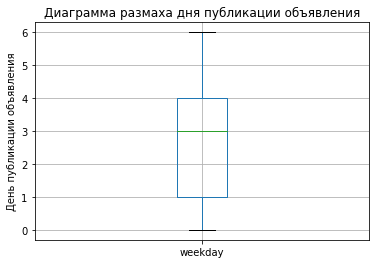

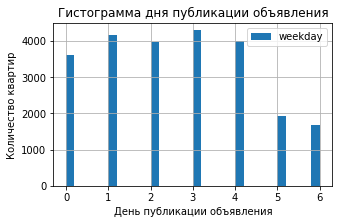

In [40]:
#Построим диаграмму размаха для дня публикации объявления
df.boxplot(['weekday'])
plt.title('Диаграмма размаха дня публикации объявления')
plt.ylabel('День публикации объявления')
#Гистограмму ,чтобы знать распределение частот
df.plot(y = 'weekday', kind = 'hist', grid=True, bins=30, figsize = (5,3))
plt.title('Гистограмма дня публикации объявления')
plt.xlabel('День публикации объявления')
plt.ylabel('Количество квартир')
#Общие статистические сведения о столбце
print(df['weekday'].describe())

count    23613.000000
mean         6.400076
std          3.493160
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64


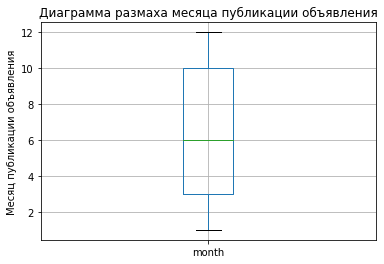

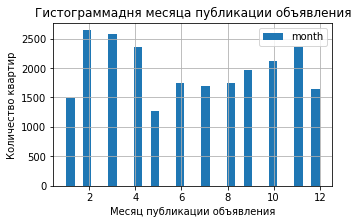

In [41]:
#Построим диаграмму размаха для дня публикации объявления
df.boxplot(['month'])
plt.title('Диаграмма размаха месяца публикации объявления')
plt.ylabel('Месяц публикации объявления')
#Гистограмму ,чтобы знать распределение частот
df.plot(y = 'month', kind = 'hist', grid=True, bins=30, figsize = (5,3))
plt.title('Гистограммадня месяца публикации объявления')
plt.xlabel('Месяц публикации объявления')
plt.ylabel('Количество квартир')
#Общие статистические сведения о столбце
print(df['month'].describe())

**4.2. Изучение времени продажи квартиры**

**Вывод:** 

Среднее количество дней прожади квартиры - 169


Медианное значение количества дней продажи квартиры - 95


Нормальными значениями обычно считаются значения, которые входят в размах "усов" диаграммы размаха. В нашем случае - это значения от 0 до 400 дней. Быстрой продажей можно считать прожажу сроком до 45 дней, долгой - свыше 200 дней. 

С учетом того, что объявление не может быть опубликовано 0 дней, выходит интервал от 1 до 400 дней. Все остальные значения - выбросы. Однако гистограмма указывает нам, что есть значения и после 400 дней публикации, и их тоже не мало. По крайней мере в районе от 400 до 600 дней. Поэтому лучшим решением будет ограничиться интервалом от 1 до 600 дней.

count    23613.000000
mean       169.347690
std        206.485173
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64


Text(0, 0.5, 'Количество квартир')

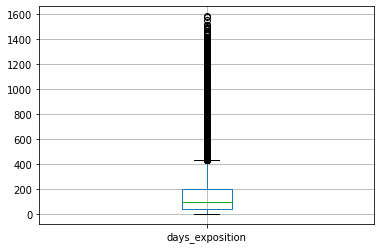

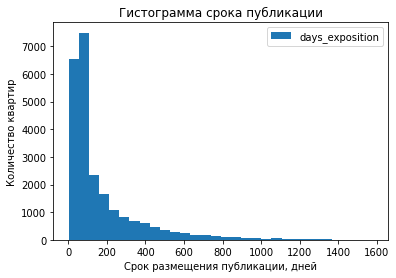

In [42]:
# Изучим среднее время продажи квартиры по объявлению, для этого построим "ящик с усами", 
# диаграмму и узнаем основные статистические характеристики по столбцу
df.boxplot(['days_exposition'])
print(df['days_exposition'].describe())
df.plot(y='days_exposition', 
          kind='hist', 
          bins=30)
plt.title('Гистограмма срока публикации')
plt.xlabel('Срок размещения публикации, дней')
plt.ylabel('Количество квартир')

**На этапе предобработки не обработали все аномальные значения. В ходе анализа, при построении диаграмм, выяснили, что есть аномальные значения, отбросим их сейчас на основе полученных выше графиков с распределениями.**

In [43]:
# Функция для подсчёта границ с учетом 1.5 размаха
def quartile_range(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    dfq = df.loc[(df[column] < q3 + 1.5*iqr) & (df[column] > q1 - 1.5*iqr), column]
    return dfq
# Столбцы с выбросами
list_features = ['last_price', 'total_area', 'kitchen_area', 'living_area', 'days_exposition', 'ceiling_height', 'rooms']
for col in list_features:
    df[col] = quartile_range(df, col)

# Возвращаем в целочисленный тип число комнат
df['rooms'] = df['rooms'].fillna(0).astype(int)

# Изучаем, есть ли выбивающиеся значения
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_nearest,days_exposition,price_per_sqm,weekday,month,year,city_сenters_nearest_km,airports_nearest_km,ponds_nearest_km,parks_nearest_km
count,23613.000000,2.156400e+04,22374.000000,23613.000000,22138.000000,23613.000000,22728.000000,23613.000000,22293.000000,23613.000000,...,9061.000000,21286.000000,2.361300e+04,23613.000000,23613.000000,23613.000000,18104.000000,18081.000000,9061.000000,8045.000000
mean,9.874518,4.839129e+06,54.346138,2.014102,2.665470,10.673824,31.563643,5.877313,9.418719,0.593063,...,518.209469,113.179743,9.939703e+04,2.568035,6.400076,2017.368102,14.185084,28.788008,0.518209,0.490555
std,5.681541,2.217292e+06,19.349696,0.986747,0.147538,6.597173,13.766925,4.873539,3.177856,0.960307,...,277.887489,96.854617,5.035803e+04,1.788565,3.493160,1.039383,8.614132,12.626210,0.277887,0.341337
min,0.000000,1.219000e+04,12.000000,0.000000,2.250000,1.000000,2.000000,1.000000,1.300000,0.000000,...,13.000000,1.000000,1.110000e+02,0.000000,1.000000,2014.000000,0.181000,0.000000,0.013000,0.001000
25%,6.000000,3.300000e+06,39.400000,1.000000,2.550000,5.000000,18.700000,2.000000,7.000000,0.000000,...,294.000000,45.000000,7.656200e+04,1.000000,3.000000,2017.000000,9.233750,18.575000,0.294000,0.288000
50%,9.000000,4.400000e+06,50.100000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,...,503.000000,95.000000,9.500000e+04,3.000000,6.000000,2017.000000,13.093000,26.726000,0.503000,0.455000
75%,14.000000,6.000000e+06,65.600000,3.000000,2.750000,16.000000,40.700000,8.000000,11.000000,1.000000,...,730.000000,147.000000,1.142060e+05,4.000000,10.000000,2018.000000,16.287000,37.242000,0.730000,0.612000
max,50.000000,1.189440e+07,114.400000,5.000000,3.050000,60.000000,76.900000,33.000000,19.450000,5.000000,...,1344.000000,429.000000,1.907500e+06,6.000000,12.000000,2019.000000,65.968000,84.869000,1.344000,3.190000


**3. Изучение факторов, влияющих на общую стоимость объекта**

**Вывод**

- Это было весьма предсказуемо, но тем не менее, следовало проверить: наиболее сильная корреляция наблюдается между площадью квартиры и ее стоимостью *(коэфф. корреляции 0,69)*. Отсюда логично проистекает связь цены с жилой площадью и площадью кухни, что подверждается в нашем исследовании: *коэффициенты корреляции 0,57 и 0,5 соответственно*.


- Стоимость квартиры также напрямую зависит от числа комнат: чем их больше, тем квартира дороже. Но это верно, пока число комнат не превышает четырех: 5- или 6-комнатные квартиры могут быть проданы дешевле 4-комнатных, и вызвано это скорее всего отсутствием спроса.


- Квартиры на первом или последнем этаже обычно продаются по более низкой цене, чем квартиры на других этажах.


- День недели и месяц публикации объявления не играют значимой роли на стоимость, по которой объект недвижимости будет продан.

<AxesSubplot:xlabel='total_area'>

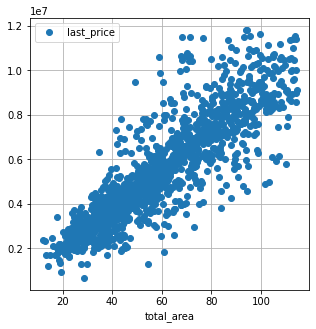

In [44]:
# Зависимость цены от общей площади
(df.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)

<AxesSubplot:xlabel='living_area'>

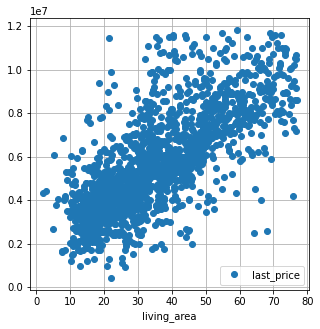

In [45]:
# Зависимость цены от жилой площади
(df.pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)

<AxesSubplot:xlabel='kitchen_area'>

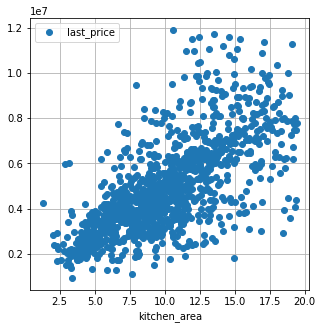

In [46]:
# Зависимость цены от площади кухни
(df.pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)

<AxesSubplot:xlabel='rooms'>

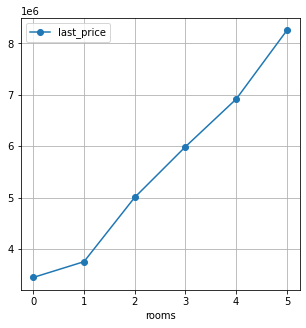

In [47]:
# Зависимость цены от количества комнат
(df.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='-o', figsize=(5, 5))
)

<AxesSubplot:xlabel='rooms'>

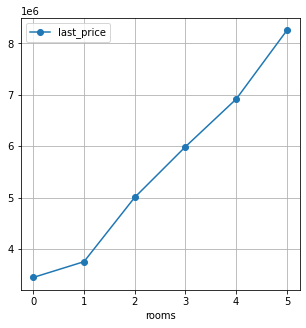

In [48]:
# Зависимость цены от количества комнат
(df.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='-o', figsize=(5, 5))
)

<AxesSubplot:xlabel='floor_type'>

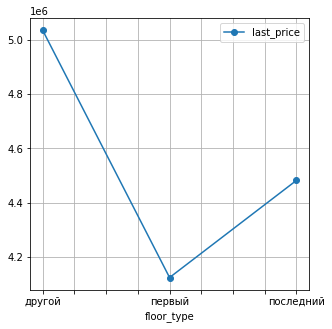

In [49]:
# Зависимость цены от количества комнат
(df.pivot_table(index='floor_type', values='last_price')
    .plot(grid=True, style='-o', figsize=(5, 5))
)

<AxesSubplot:xlabel='days_exposition'>

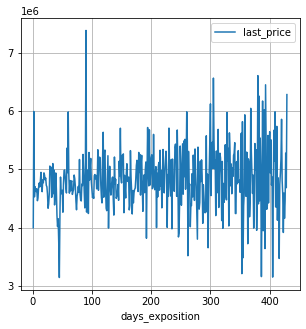

In [50]:
# Зависимость цены от даты размещения
(df.pivot_table(index='days_exposition', values='last_price')
    .plot(grid=True, style='-', figsize=(5, 5))
)

In [51]:
#Вызываем таблицу корреляции для того, чтобы определить какие факторы влияют на общую стоимость
df.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,ponds_nearest,days_exposition,price_per_sqm,weekday,month,year,city_сenters_nearest_km,airports_nearest_km,ponds_nearest_km,parks_nearest_km
total_images,1.000000,0.157695,0.127092,0.100456,0.033123,0.010427,0.114230,0.033286,0.010423,-0.028116,...,-0.003601,0.016174,0.133320,-0.009252,0.004693,0.138778,-0.047935,-0.002632,-0.003601,-0.006209
last_price,0.157695,1.000000,0.694305,0.443969,0.306922,0.185948,0.573849,0.127732,0.022582,-0.068892,...,-0.053048,0.036421,0.608778,-0.015527,0.005977,-0.002768,-0.345306,-0.039550,-0.053048,0.027863
total_area,0.127092,0.694305,1.000000,0.784896,0.232222,-0.022090,0.909809,-0.020517,0.019588,-0.111155,...,-0.054879,0.089693,0.117274,-0.012877,0.007139,-0.060770,-0.182942,-0.027448,-0.054879,0.023582
rooms,0.100456,0.443969,0.784896,1.000000,0.041066,-0.207838,0.867246,-0.145683,-0.003459,-0.154980,...,-0.032176,0.082467,0.004801,-0.000580,0.000575,-0.059446,-0.136294,-0.043957,-0.032176,-0.037328
ceiling_height,0.033123,0.306922,0.232222,0.041066,1.000000,0.156785,0.148147,0.107254,0.039832,0.028139,...,-0.102905,0.038729,0.268095,0.000740,0.004425,-0.061176,-0.207536,-0.038927,-0.102905,-0.021132
floors_total,0.010427,0.185948,-0.022090,-0.207838,0.156785,1.000000,-0.149544,0.678059,-0.026351,0.070151,...,0.038864,-0.039460,0.148098,0.013151,0.016651,0.007845,0.019774,0.108288,0.038864,0.097527
living_area,0.114230,0.573849,0.909809,0.867246,0.148147,-0.149544,1.000000,-0.107870,0.019783,-0.074564,...,-0.048459,0.086799,0.065650,-0.007829,0.003566,-0.053901,-0.172464,-0.044102,-0.048459,-0.013375
floor,0.033286,0.127732,-0.020517,-0.145683,0.107254,0.678059,-0.107870,1.000000,-0.013208,0.035908,...,0.025381,-0.030645,0.129113,0.011610,0.020641,0.005045,0.008963,0.072878,0.025381,0.072874
is_apartment,0.010423,0.022582,0.019588,-0.003459,0.039832,-0.026351,0.019783,-0.013208,1.000000,-0.003633,...,0.003317,-0.009860,0.044784,-0.009479,0.002373,0.009391,0.003772,0.016532,0.003317,-0.033541
studio,-0.028116,-0.068892,-0.111155,-0.154980,0.028139,0.070151,-0.074564,0.035908,-0.003633,1.000000,...,0.001858,-0.022222,0.015536,-0.000886,-0.000682,0.011049,-0.006793,-0.021643,0.001858,0.006925


<AxesSubplot:>

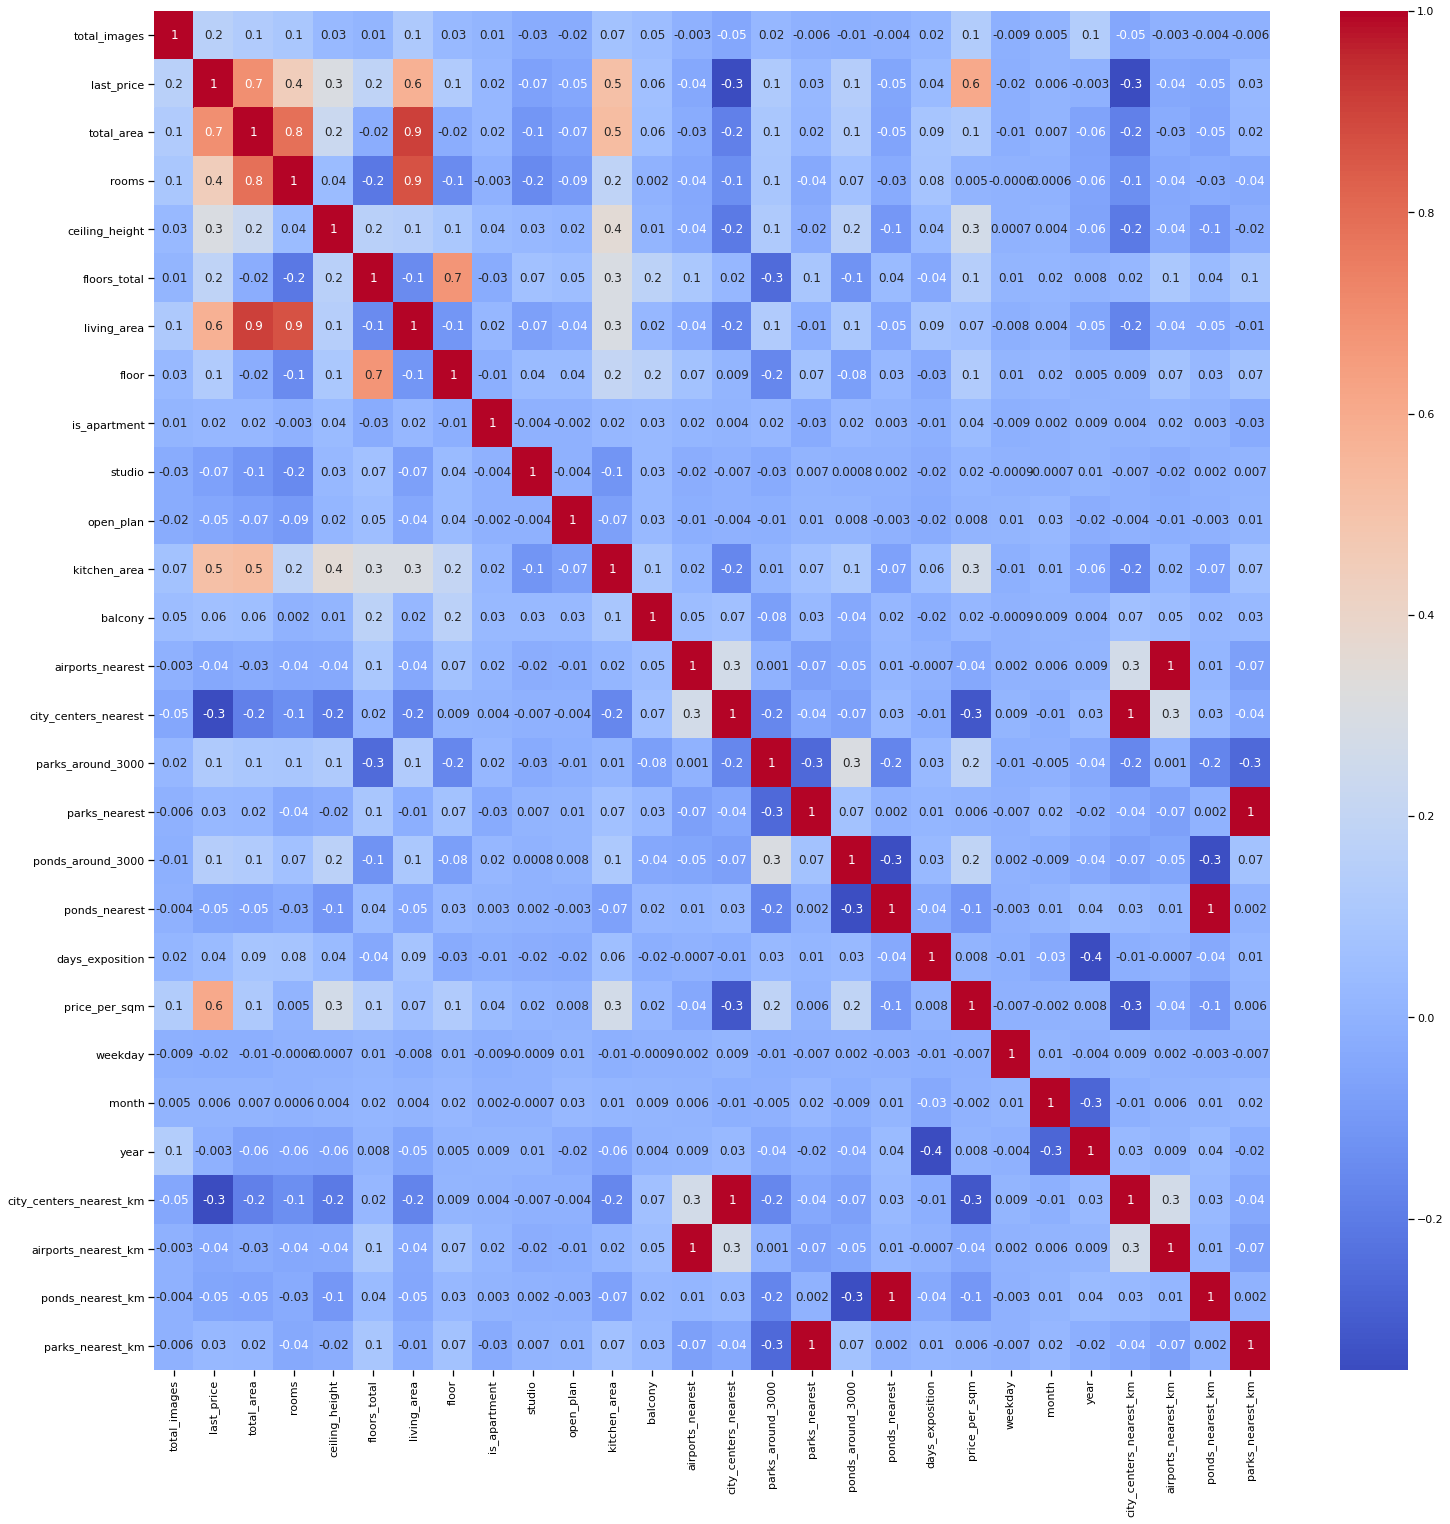

In [64]:
#Добавим хитмэп 
plt.figure(figsize=(25, 25))
sns.heatmap(df.corr(), annot = True, fmt = '.1g', cmap= 'coolwarm')

In [ ]:
#Вызываем матрицу диаграмм рассеяния для того, чтобы определить какие факторы влияют на общую стоимость
sns.pairplot(df, 
                 vars=['last_price','total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_type', 'days_exposition'],
                 height=3)


**4. 10 населенных пунктов с наибольшим числом объявлений**

**Вывод**

Из представленных 10 населенных пунктов с наибольшим числом объявлений лидеры по средней цене квадратного метра: **Санкт-Петербург, поселок Мурино, деревня Кудрово и поселок Шушары.**

Однако в среднем дешевле всего квадратные метры в **Выборге и Гатчине**.

Результаты вызывают вопросы: цена квадратного метра в деревне больше, чем в городе. Возможно такая разница в средней цене квадратного метра обоснована и вызвана близостью к центру Санкт-Петербурга.

In [ ]:
median_price_per_sqm = df.pivot_table(index='locality_name', values='price_per_sqm', aggfunc=['count', 'median'])
median_price_per_sqm.columns = ['count', 'median']
median_price_per_sqm.sort_values('count', ascending=False).head(10)

**5. Изучение зависимости стоимости объектов от расстояния до центра города.**

**Вывод**

Чем дальше от центра города, тем в среднем квартира будет стоить дешевле: в среднем разница в стоимости между первым и восьмым километром от центра может достигать 2 млн руб.

In [ ]:
pivot_table_km = df.query('locality_name == "Санкт-Петербург"').pivot_table(index = 'city_сenters_nearest_km', values = 'price_per_sqm', aggfunc = 'mean')
pivot_table_km.plot()
plt.title('График зависимости стоимости квадратного метра от расстояния до центра города')
plt.xlabel('Расстояние до центра города, км.')
plt.ylabel('Сердняя цена за кв.м., руб.')
pivot_table_km

### Общий вывод

**Срок продажи квартиры**

- Чаще всего квартиру продают за 95 дней. Если меньше 45 дней, то это быстро, если дольше 230 дней - это долго.
- Есть большое число квартир, проданных всего за несколько дней после публикации.
- Также есть варианты, которые продавались несколько десятков месяцев.


**Факторы, влияющие на стоимость**

- На стоимость больше влияет площадь квартиры (общая, жилая, кухонная), нежели число комнат. Т.е. могут быть дорогие квартиры с малым числом комнат, но где комнаты просторные.
- Первый этаж значительно дешевле остальных вариантов. Также стоимость квартиры на последнем этаже ниже, чем на остальных, кроме первого.


**Стоимость квадратного метра в топ-10 населённых пунктов**

- Дороже всего квадратный метр в Санкт-Петербурге - 104774
- Дешевле всего квадратный метр в Выборге - 58158